In [1]:
## How to use this file?
'''
errAll=np.array(errAll)*100.0
endingErrorAll=np.array(endingErrorAll)*100.0
lat95All=np.array(lat95All)
thrAll=np.array(thrAll)/1000.0

# int8 = int8 / int8_fp32 * mm
lat95All[0] = lat95All[0]/lat95All[-2]*lat95All[-1]
thrAll[0] = thrAll[0]/thrAll[-2]*thrAll[-1]

breakpoint()

#draw2yBar(methodTags,[lat95All[0][0],lat95All[1][0],lat95All[2][0],lat95All[3][0]],[errAll[0][0],errAll[1][0],errAll[2][0],errAll[3][0]],'95% latency (ms)','Error (%)',figPath + "sec6_5_stock_q1_normal")
groupBar2.DrawFigure(dataSetNames, errAll, methodTags, "Datasets", "Error (%)",
                        5, 15, figPath + "sec4_1_cca_static_lazy_fro", True)
groupBar2.DrawFigure(dataSetNames, endingErrorAll, methodTags, "Datasets", "Error (%)",
                        5, 15, figPath + "sec4_1_cca_static_lazy_ending_error", True)
groupBar2.DrawFigure(dataSetNames, np.log(lat95All), methodTags, "Datasets", "95% latency (ms)",
                        5, 15, figPath + "sec4_1_cca_static_lazy_latency_log", True)
groupBar2.DrawFigure(dataSetNames, np.log(thrAll), methodTags, "Datasets", "elements/ms",
                        5, 15, figPath + "sec4_1_cca_static_lazy_throughput_log", True)
'''
# put breakpoint() right above DrawFigure, and manually put here

'\nerrAll=np.array(errAll)*100.0\nendingErrorAll=np.array(endingErrorAll)*100.0\nlat95All=np.array(lat95All)\nthrAll=np.array(thrAll)/1000.0\n\n# int8 = int8 / int8_fp32 * mm\nlat95All[0] = lat95All[0]/lat95All[-2]*lat95All[-1]\nthrAll[0] = thrAll[0]/thrAll[-2]*thrAll[-1]\n\nbreakpoint()\n\n#draw2yBar(methodTags,[lat95All[0][0],lat95All[1][0],lat95All[2][0],lat95All[3][0]],[errAll[0][0],errAll[1][0],errAll[2][0],errAll[3][0]],\'95% latency (ms)\',\'Error (%)\',figPath + "sec6_5_stock_q1_normal")\ngroupBar2.DrawFigure(dataSetNames, errAll, methodTags, "Datasets", "Error (%)",\n                        5, 15, figPath + "sec4_1_cca_static_lazy_fro", True)\ngroupBar2.DrawFigure(dataSetNames, endingErrorAll, methodTags, "Datasets", "Error (%)",\n                        5, 15, figPath + "sec4_1_cca_static_lazy_ending_error", True)\ngroupBar2.DrawFigure(dataSetNames, np.log(lat95All), methodTags, "Datasets", "95% latency (ms)",\n                        5, 15, figPath + "sec4_1_cca_static_lazy_

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LinearLocator
import matplotlib.ticker as mtick

In [3]:
def DrawFigure(x_values, y_values, legend_labels, x_label, y_label, y_min, y_max, filename, allow_legend):
    fig = plt.figure(figsize=(20, 6))
    figure = fig.add_subplot(111)

    LINE_COLORS = [
        '#FF8C00', '#FFE4C4', '#00FFFF', '#E0FFFF',
        '#FF6347', '#98FB98', '#800080', '#FFD700',
        '#7CFC00', '#8A2BE2', '#FF4500', '#20B2AA',
        '#B0E0E6', '#DC143C', '#00FF7F'
    ]
    HATCH_PATTERNS = ['/', '-', 'o', '///', '\\', '|', 'x', '\\\\', '+', '.', '*', 'oo', '++++', '....', 'xxx']

    FIGURE_LABEL = legend_labels
    index = np.arange(len(x_values))
    width = 0.1 / len(x_values)
    bars = [None] * (len(FIGURE_LABEL))
    for i in range(len(y_values)):
        bars[i] = plt.bar(index + i * width + width / 2,
                          y_values[i], width,
                          hatch=HATCH_PATTERNS[i % len(HATCH_PATTERNS)],
                          color=LINE_COLORS[i % len(LINE_COLORS)],
                          label=FIGURE_LABEL[i], edgecolor='black', linewidth=3)
        
    if allow_legend:
        plt.legend(bars, FIGURE_LABEL,
                prop={'size': 16},
                ncol=len(bars),  # Set the number of columns to match the number of bars
                loc='upper center',
                bbox_to_anchor=(0.5, 1.15),  # Adjust the position
                shadow=True, frameon=True, edgecolor='black', borderaxespad=0,columnspacing=0.2,handletextpad=0
                )

    plt.xticks(index + len(x_values) / 2 * width, x_values, rotation=0)
    figure.yaxis.set_major_locator(LinearLocator(5))
# figure.xaxis.set_major_locator(LinearLocator(5))
    figure.get_xaxis().set_tick_params(direction='in', pad=10)
    figure.get_yaxis().set_tick_params(direction='in', pad=10)
    figure.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)

    save_path = filename + ".pdf"
    if not os.path.exists(os.path.dirname(save_path)):
        os.makedirs(os.path.dirname(save_path))

    fig.savefig(save_path, bbox_inches='tight')

In [4]:
dataSetNames=['SIFT', 'MNIST']
algosVec=['int8', 'crs', 'countSketch', 'cooFD', 'blockLRA', 'fastjlt', 'vq', 'pq', 'rip', 'smp-pca', 'weighted-cr', 'tugOfWar', 'int8_fp32', 'mm']
algoDisp=['INT8', 'CRS', 'CS', 'CoOFD', 'BlockLRA', 'FastJLT', 'VQ', 'PQ', 'RIP', 'SMP-PCA', 'WeightedCR', 'TugOfWar',  'NLMM', 'LTMM']
methodTags =algoDisp
figPath = os.path.abspath(os.path.join(os.getcwd(), "../..")) + "/figures/DownstreamPCACCA_static_lazy/"

In [5]:
def getStackedArray(arrPCA, arrCCA): return np.stack((np.array(arrPCA).flatten(), np.array(arrCCA).flatten()), 1)

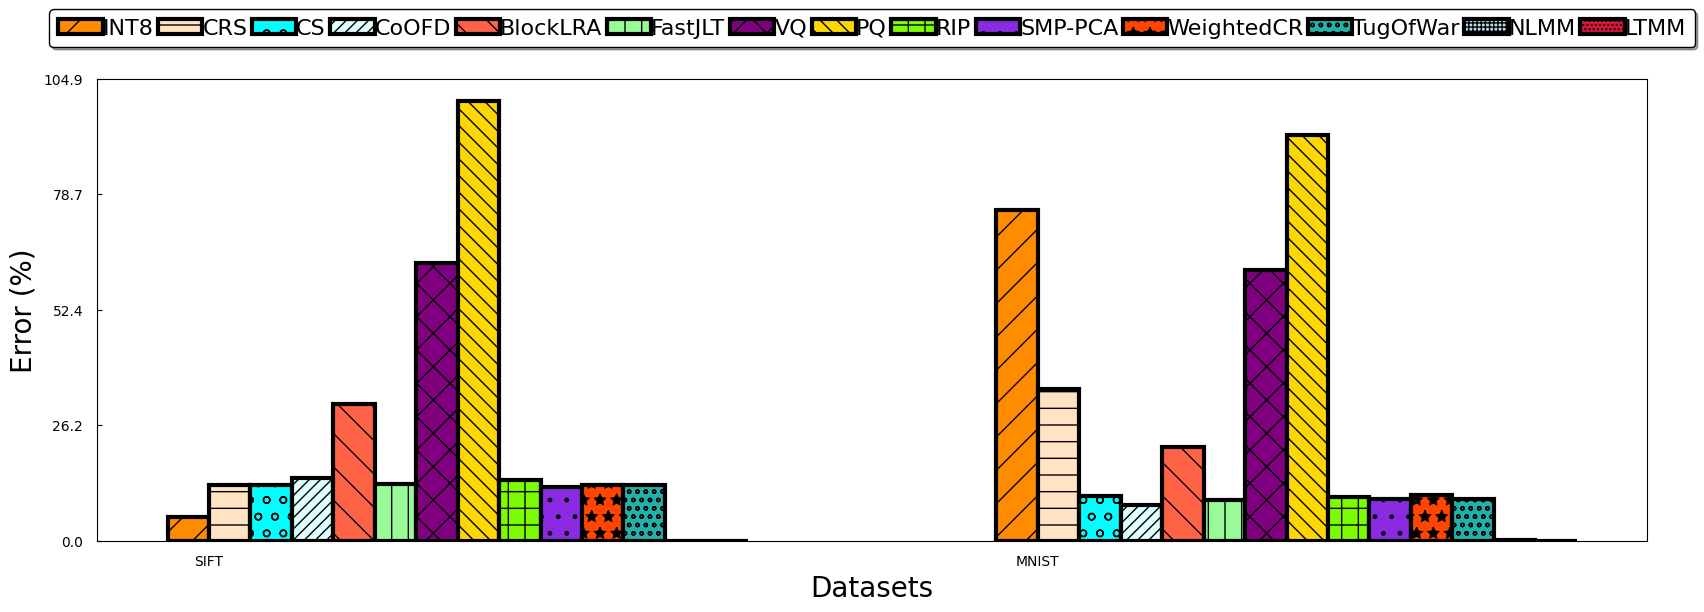

In [6]:
errAllPCA = [[5.41440e+00],
       [1.25173e+01],
       [1.25387e+01],
       [1.41165e+01],
       [3.09672e+01],
       [1.29469e+01],
       [6.30151e+01],
       [9.98892e+01],
       [1.37068e+01],
       [1.22508e+01],
       [1.26620e+01],
       [1.25088e+01],
       [1.20000e-03],
       [0.00000e+00]]
errAllCCA = [[7.49824e+01],
       [3.43199e+01],
       [1.01752e+01],
       [8.07350e+00],
       [2.12393e+01],
       [9.31790e+00],
       [6.13148e+01],
       [9.20380e+01],
       [9.84140e+00],
       [9.44060e+00],  
       [1.02308e+01],
       [9.49850e+00],
       [3.16000e-02],
       [0.00000e+00]]
errAll = getStackedArray(errAllPCA, errAllCCA)
DrawFigure(dataSetNames, errAll, methodTags, "Datasets", "Error (%)", 5, 15, figPath + "sec4_1_pcacca_static_lazy_fro", True)

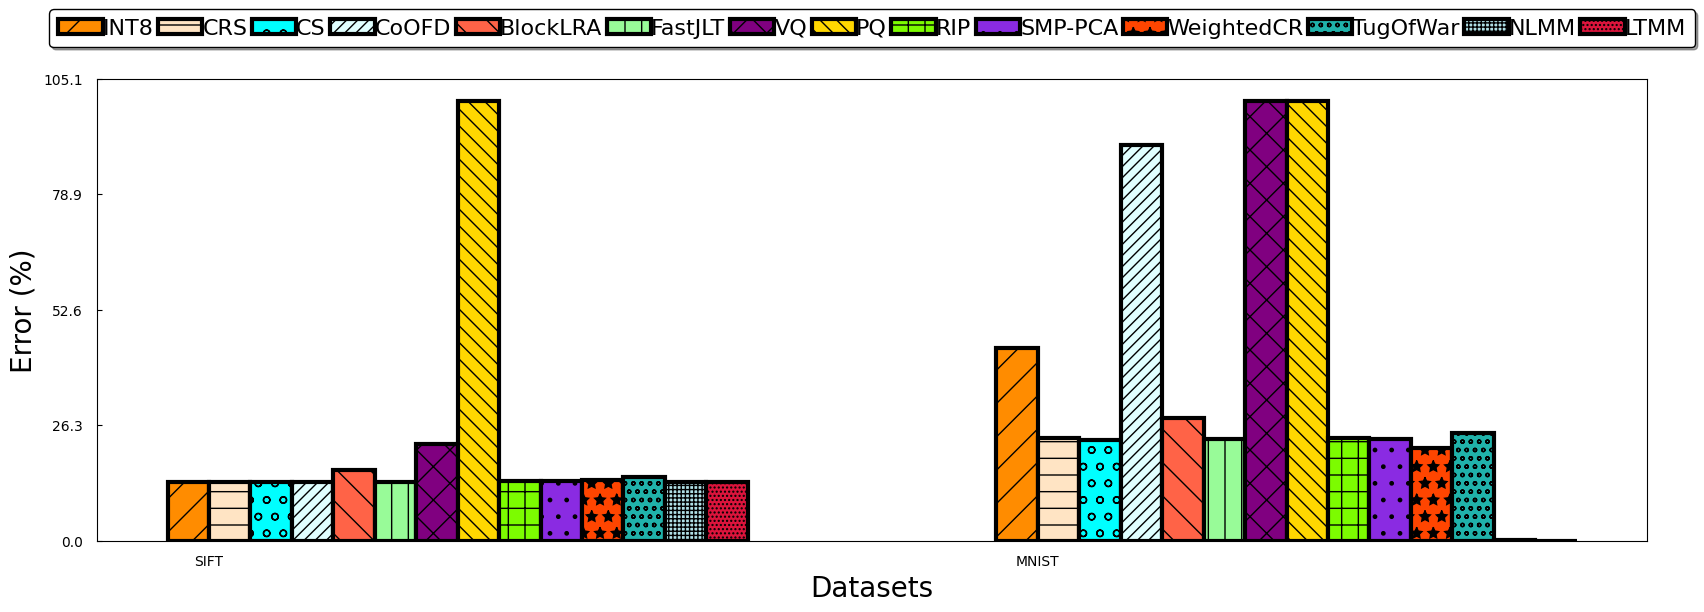

In [7]:
endingErrorPCA = [[ 13.227 ],
       [ 13.3609],
       [ 13.3442],
       [ 13.2273],
       [ 15.9671],
       [ 13.3201],
       [ 21.9382],
       [100.133 ],
       [ 13.6035],
       [ 13.5607],
       [ 13.8621],
       [ 14.4983],
       [ 13.2268],
       [ 13.2268]]
endingErrorCCA = [[ 43.8356],
       [ 23.416 ],
       [ 22.819 ],
       [ 89.9833],
       [ 27.8662],
       [ 23.0831],
       [100.    ],
       [100.    ],
       [ 23.3388],
       [ 23.1308],
       [ 20.9874],
       [ 24.5536],
       [  0.1152],
       [  0.    ]]
endingErrorAll = getStackedArray(endingErrorPCA, endingErrorCCA)
DrawFigure(dataSetNames, endingErrorAll, methodTags, "Datasets", "Error (%)",
                        5, 15, figPath + "sec4_1_pcacca_static_lazy_ending_error", True)

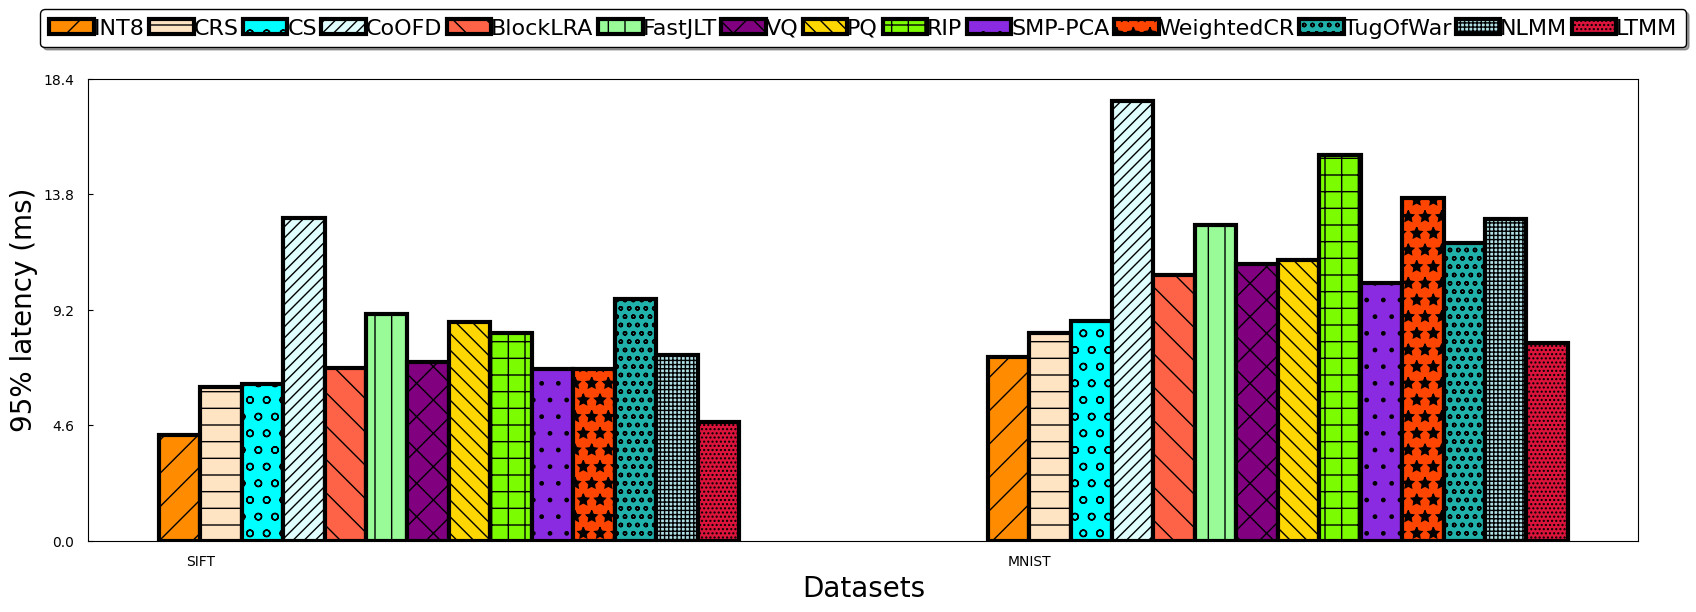

In [8]:
# paper 4.1
# The slowest pruning-based method CS can
# achieve to take only 0.54× and 0.51× time of the fastest hybrid
# method SMP-PCA and extraction-based method BlockLRA on
# PCA task, and 0.22× and 0.15× on CCA task

# 5.10403000e+02/9.38241000e+02, 5.10403000e+02/9.97248000e+02
# (0.5439998891542791, 0.5118115052624823)
# 6.33570300e+03/2.87076990e+04, 6.33570300e+03/4.03636990e+04
# (0.22069699839057114, 0.15696537128571889)

lat95PCA = [[6.87016825e+01],
       [4.49750000e+02],
       [5.10403000e+02],
       [3.82407570e+05],
       [9.97248000e+02],
       [8.40833600e+03],
       [1.26121400e+03],
       [6.21280000e+03],
       [3.97931000e+03],
       [9.38241000e+02],
       [9.46093000e+02],
       [1.50441030e+04],
       [1.66783500e+03],
       [1.11310000e+02]]
lat95CCA = [[1.53697776e+03],
       [3.88766800e+03],
       [6.33570300e+03],
       [4.21591637e+07],
       [4.03636990e+04],
       [2.88707714e+05],
       [6.09477010e+04],
       [7.15157100e+04],
       [4.82443970e+06],
       [2.87076990e+04],
       [8.50567699e+05],
       [1.40903685e+05],
       [3.71695694e+05],
       [2.69572500e+03]]
lat95All = getStackedArray(lat95PCA, lat95CCA)
DrawFigure(dataSetNames, np.log(lat95All), methodTags, "Datasets", "95% latency (ms)",
                        5, 15, figPath + "sec4_1_pcacca_static_lazy_latency_log", True)

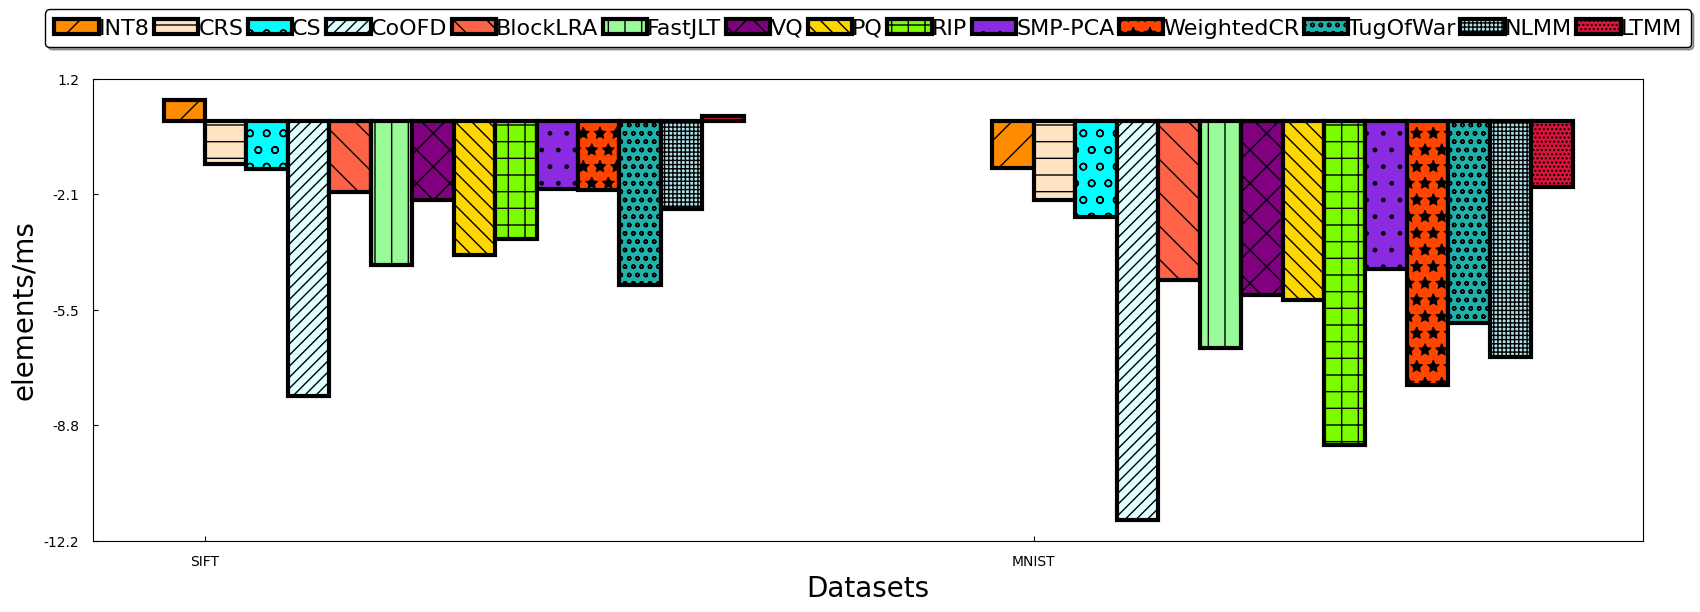

In [9]:
thrPCA = [[1.86307279e+00],
       [2.84601291e-01],
       [2.50779277e-01],
       [3.34721000e-04],
       [1.28352456e-01],
       [1.52229790e-02],
       [1.01489195e-01],
       [2.06026100e-02],
       [3.21663400e-02],
       [1.36424921e-01],
       [1.35292538e-01],
       [8.50831400e-03],
       [7.67460170e-02],
       [1.14991061e+00]]
thrCCA = [[2.55045971e-01],
       [1.00831655e-01],
       [6.18715870e-02],
       [9.29800000e-06],
       [9.71169700e-03],
       [1.35777500e-03],
       [6.43174400e-03],
       [5.48131300e-03],
       [8.12530000e-05],
       [1.36548740e-02],
       [4.60869000e-04],
       [2.78204200e-03],
       [1.05462600e-03],
       [1.45415426e-01]]
thrAll = getStackedArray(thrPCA, thrCCA)
DrawFigure(dataSetNames, np.log(thrAll), methodTags, "Datasets", "elements/ms",
                        5, 15, figPath + "sec4_1_pcacca_static_lazy_throughput_log", True)